In [1]:
import cv2

In [2]:
img = cv2.imread("/content/drive/MyDrive/My photos/WhatsApp Image 2022-08-10 at 10.50.16 PM.jpeg") # image for first 8 questions/task

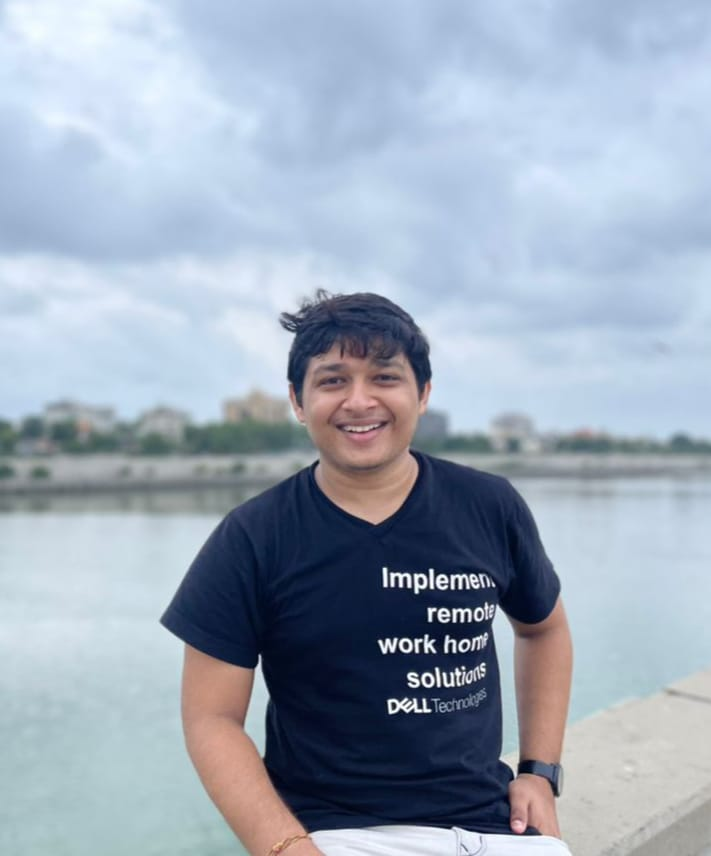

Shape of the Image Shown Above is: (856, 711, 3)


In [3]:
from google.colab.patches import cv2_imshow #imported cv2_imshow because imshow() dont work in colab
cv2_imshow(img)
print("Shape of the Image Shown Above is:" , img.shape)

The Imported Image is having RGB layers

Image is 2-Dimentional, 3 Layered 

In [4]:
img[495:500,495:500,:]

array([[[78, 46, 33],
        [84, 51, 36],
        [85, 52, 37],
        [85, 54, 39],
        [84, 53, 38]],

       [[76, 45, 30],
        [80, 48, 35],
        [84, 52, 39],
        [87, 55, 42],
        [87, 55, 42]],

       [[75, 44, 29],
        [78, 46, 33],
        [82, 50, 37],
        [85, 53, 40],
        [85, 53, 40]],

       [[74, 43, 28],
        [77, 45, 32],
        [80, 48, 35],
        [83, 51, 38],
        [83, 51, 38]],

       [[72, 41, 26],
        [76, 44, 31],
        [78, 46, 33],
        [81, 49, 36],
        [83, 51, 38]]], dtype=uint8)

The origin, (0, 0), is located at the top-left of the image. OpenCV images are zero-indexed, where the x-values go left-to-right (column number) and y-values go top-to-bottom (row number)

source:https://pyimagesearch.com/

In [5]:
newimg1 = img.copy() 


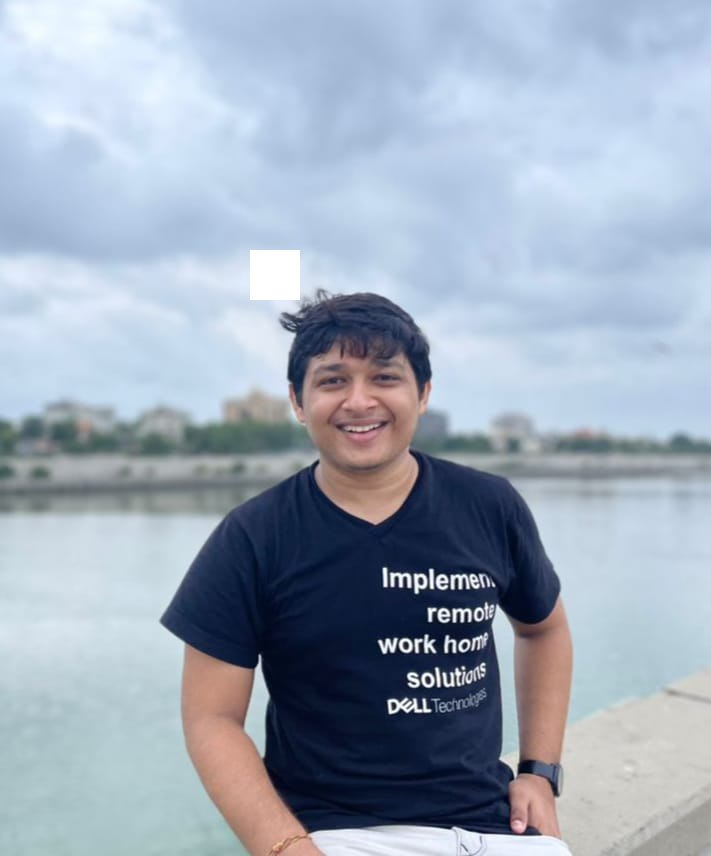

In [6]:
# the values set to 255 will be white because RGB all have same values so, it will be added to white

newimg1[250:300,250:300,:] = 255
cv2_imshow(newimg1)

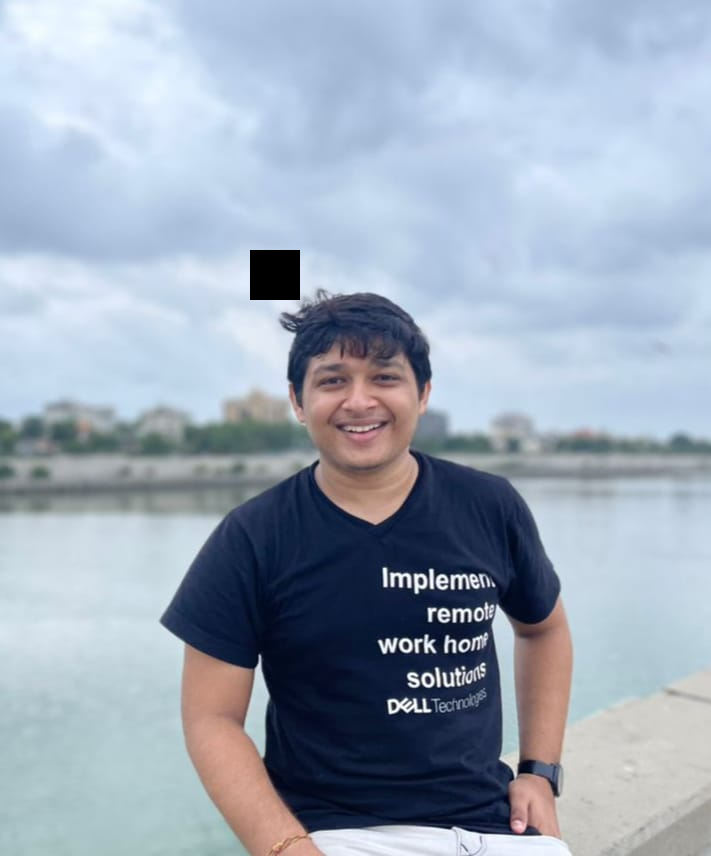

In [7]:
# the intensity range will start repeating from 256, so we can assume 256 as 0 intensities of R G B all.
# so it will generate totally black area
newimg2 = img.copy()
newimg2[250:300,250:300,:] = 256
cv2_imshow(newimg2)

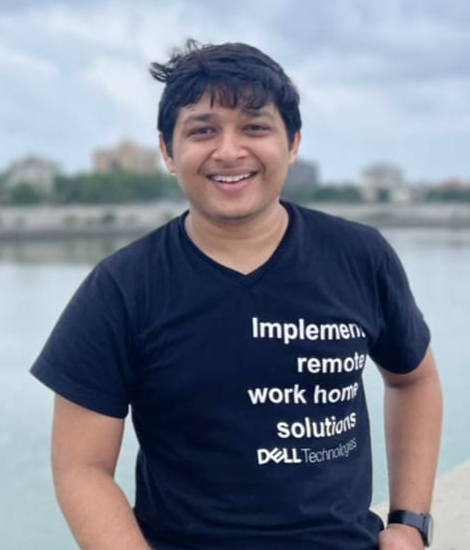

In [8]:
cropimg = img[250:800,130:600,:] # cropped image just by indexing of array
cv2_imshow(cropimg)

In [9]:
# saving file to location 

cv2.imwrite(r"C:\Users\lenovo\Desktop\cropimg.png",cropimg) 
#Source:"https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/"

True

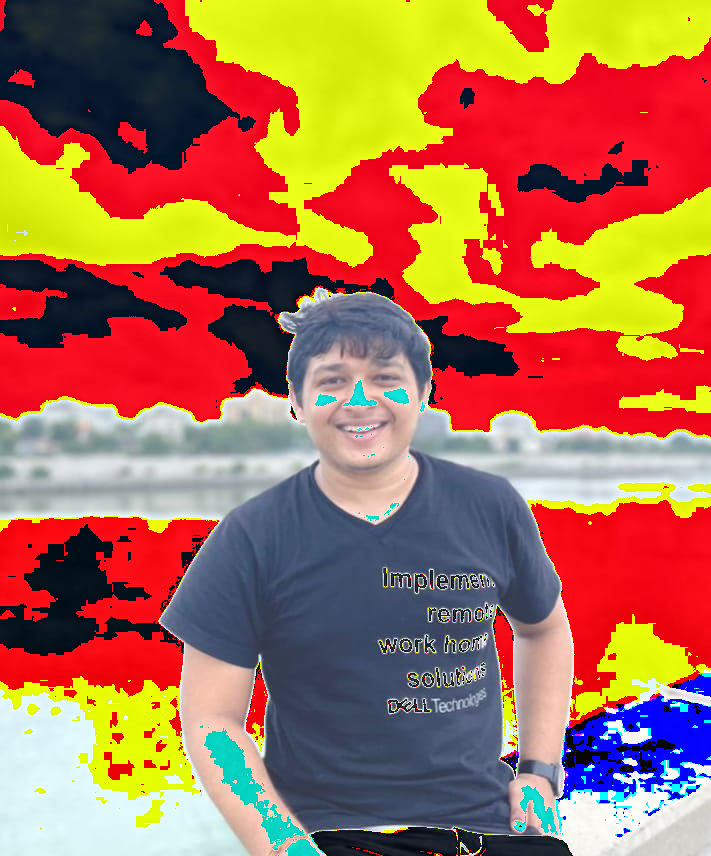

In [10]:
cv2_imshow(img+50)

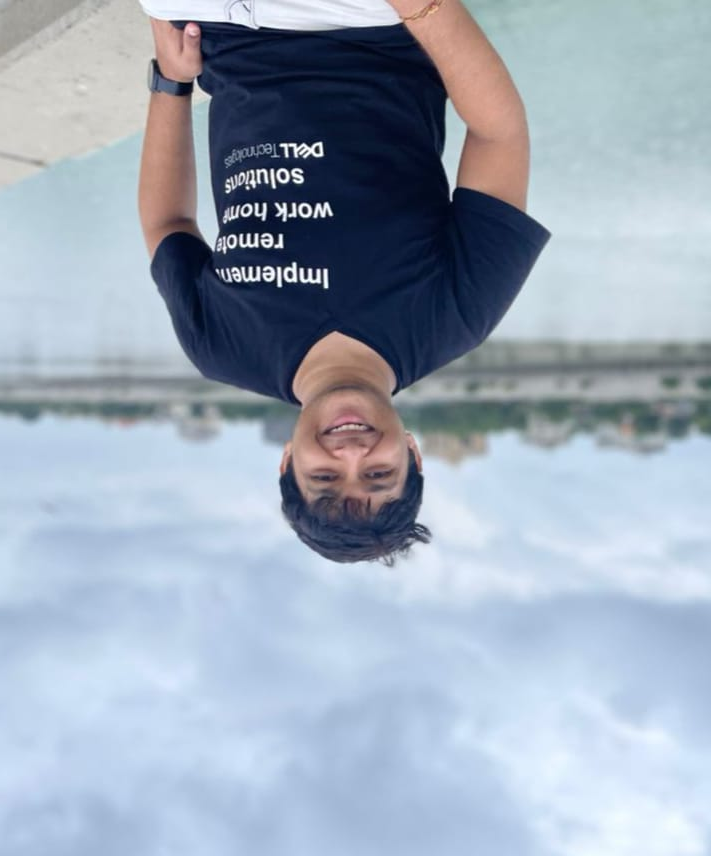

In [11]:
#verticle flip of image using flip function, in-built in openCV
#-1 for verticle flip 
verticle_flip = cv2.flip(img,-1)
cv2_imshow(verticle_flip)

Night-Shot Image imported as GrayScale

Image source:https://www.theverge.com/2018/11/14/18092660/google-night-sight-review-pixel-2-3-camera-photos-image-quality

In [37]:
# this image will be used for all the question from 8 to 12
img_2 = cv2.imread("/content/drive/MyDrive/My photos/MVIMG_20181112_120310a.jpg",0)
cv2_imshow(img_2)
print(img_2.shape)

Output hidden; open in https://colab.research.google.com to view.

Histogram of Imported Night-Shot

Histogram of img_2 


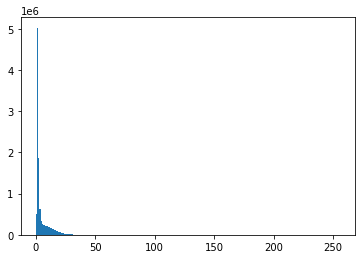

In [38]:
#histogram of img_2 , originally imported image

plt.hist(img_2.ravel(),256,[0,256])
print("Histogram of img_2 ")
plt.show()

Brighten The Image 

In [41]:
cv2_imshow(img_2*2.5)  # brighten the image using a = 2.5


Output hidden; open in https://colab.research.google.com to view.

Power Transformation of Image using Different Gamma Values

In [39]:
import numpy as np
import matplotlib.pyplot as plt

for gamma in [0.1, 0.5,0.55,0.9, 1.2, 2.2]:  # for different values of gamma i have run a loop to check
      
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img_2/255)**gamma, dtype = 'uint8')
  
    # Save edited images.
    cv2_imshow(gamma_corrected)
    #first i plotted power converted images for all values then i found gamma = 0.55 most suitable 
    #so that's why i added below code snnipet for histogram of perticuler that value
    if gamma == 0.55:
        hist = cv2.calcHist([gamma_corrected],[0],None,[256],[0,256])
        plt.plot(hist)
        plt.show()
    print("gamma is =",gamma)
    

Output hidden; open in https://colab.research.google.com to view.

Histogram Equalization Using OpenCV Library 

In [22]:
#histogram equlization of img_2, which is original image i imported
equ = cv2.equalizeHist(img_2)
cv2_imshow(equ)
  

Output hidden; open in https://colab.research.google.com to view.

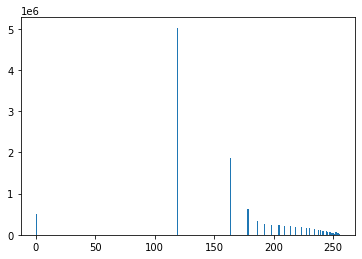

Comment: Histogram is Not Flat Because the Image have maximum pixels having low intensity values,
         That is Why during creation of Descrete Histogram the Major Value lie on the single pixel value


In [46]:
# Equilized Histogram 
plt.hist(equ.ravel(),256,[0,256])
plt.show()




print("Comment: Histogram is Not Flat Because the Image have maximum pixels having low intensity values,")
print("         That is Why during creation of Descrete Histogram the Major Value lie on the single pixel value")

In [51]:
img_3 = cv2.imread("/content/drive/MyDrive/My photos/IMG_20181112_120316a.jpg",0) #reading of target image which i already have through sources mentioned below
img_4 = img_3[0:2907,0:3876]  #to match channel with the img_2, i have created img_4, which is target image in my case
cv2_imshow(img_4) 
print(img_4.shape)


print("Target Histogram Should look like:")
#histogram for target image
plt.hist(img_4.ravel(),256,[0,256])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Histogram Equalization 
A good histogram in my image will mostly match to the graph of function i/x^n when n > 5, x>0



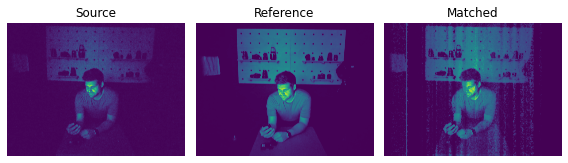

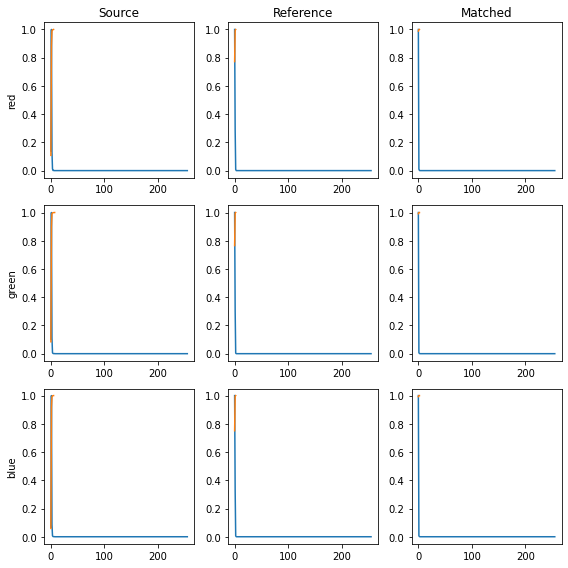

In [50]:
from skimage import exposure  ## library import for histogram matching task
from skimage.exposure import match_histograms

#set image and reference image for image matching
img = img_2
reference = img_4


#applied match_histogram library from sklearn
matched = match_histograms(image, reference ,
                           multichannel=True)
  
#Graph and Image Plotting to show comparison between images and histograms

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(8, 3),
                                    sharex=True, sharey=True)
  
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
  
ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
  
plt.tight_layout()
plt.show()
  
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], 
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)
  
axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
  
plt.tight_layout()
plt.show()



# Sources:
1)https://www.geeksforgeeks.org/

2)https://www.theverge.com/

3)https://docs.opencv.org/
